###  BUSINESS UNDERSTANDING
Primary Objective: Predict firm-level loss reporting

Target Variable: LOSS_FLAG (1 if profit_loss_before_tax < 0)

Key Predictors: Financial ratios, cost structures, firm characteristics

Stakeholders: Kenya Revenue Authority, National Treasury
 

### DATA UNDERSTANDING


In [1]:
# Load data
import pandas as pd
import numpy as np
df = pd.read_csv('CIT2024.csv', low_memory=False)

print(f"• Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"• Time Period: {df['period_from'].min()} to {df['period_to'].max()}")
print()

# Target Variable Check
print("Target Variable Check:")
if 'profit_loss_before_tax' in df.columns:
    loss_rate = (df['profit_loss_before_tax'] < 0).mean() * 100
    print(f"   ✓ profit_loss_before_tax present → Loss rate: {loss_rate:.1f}%")
else:
    print("   ✗ WARNING: Target variable not found!")
print()

# Key Predictor Availability
print("Key Predictor Availability:")
key_vars = ['grossturnover', 'gross_profit', 'total_employment_exp', 'cost_of_sales']
available = [v for v in key_vars if v in df.columns]
print(f"   • Available: {len(available)}/{len(key_vars)}")
print(f"   • List: {available}")
print()

# Duplicate Check
print("Duplicate Check:")
duplicate_count = df.duplicated().sum()
print(f"   • Duplicate rows found: {duplicate_count:,}")
if duplicate_count > 0:
    print(f"   • Percentage: {duplicate_count/len(df)*100:.2f}%")
else:
    print("   • Status: No duplicates")
print()

# Data Type Check
print("Data Type Overview:")
print(f"   • Total columns: {df.shape[1]}")
print(f"   • Numeric columns: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"   • Object columns: {df.select_dtypes(include=['object']).shape[1]}")
print(f"   • Date columns: {len([col for col in df.columns if 'date' in col.lower() or 'dt' in col.lower()])}")
print()

# Show data types for key columns
print("Key Column Data Types:")
key_columns_check = ['profit_loss_before_tax', 'grossturnover', 'gross_profit', 'business_type', 'filing_date']
for col in key_columns_check:
    if col in df.columns:
        print(f"   • {col}: {df[col].dtype} (sample: {df[col].iloc[0] if not pd.isna(df[col].iloc[0]) else 'NaN'})")
print()

# Missing Values Check
print("Missing Values Analysis:")
print("-" * 20)

# Calculate missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Create a summary
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percent': missing_percent
})

# Show columns with missing values (sorted by highest percentage)
cols_with_missing = missing_summary[missing_summary['Missing_Count'] > 0]
print(f"• Columns with missing values: {len(cols_with_missing)}/{len(df.columns)}")

if len(cols_with_missing) > 0:
    print(f"• Top 10 columns with most missing values:")
    display(cols_with_missing.sort_values('Missing_Percent', ascending=False).head(10))
    
    # Summary statistics
    print(f"\n• Missing Values Summary:")
    print(f"  - Total missing cells: {missing_data.sum():,}")
    print(f"  - Average missing % per column: {missing_percent.mean():.1f}%")
    print(f"  - Max missing % in a column: {missing_percent.max():.1f}%")
    
    # Check key columns specifically
    print(f"\n• Key Columns Missing Check:")
    key_columns = ['profit_loss_before_tax', 'grossturnover', 'gross_profit', 
                   'total_employment_exp', 'cost_of_sales']
    for col in key_columns:
        if col in df.columns:
            missing = missing_data[col]
            percent = missing_percent[col]
            status = "✓ OK" if percent < 5 else "⚠️ WARNING" if percent < 20 else "✗ CRITICAL"
            print(f"  - {col}: {missing:,} missing ({percent:.1f}%) {status}")
else:
    print("• No missing values found in any column")

print()

• Dataset Shape: 313,870 rows × 61 columns
• Time Period: 1/1/2024 to 31/12/2024

Target Variable Check:
   ✓ profit_loss_before_tax present → Loss rate: 14.1%

Key Predictor Availability:
   • Available: 4/4
   • List: ['grossturnover', 'gross_profit', 'total_employment_exp', 'cost_of_sales']

Duplicate Check:
   • Duplicate rows found: 3,011
   • Percentage: 0.96%

Data Type Overview:
   • Total columns: 61
   • Numeric columns: 47
   • Object columns: 14
   • Date columns: 3

Key Column Data Types:
   • profit_loss_before_tax: float64 (sample: 8191.08)
   • grossturnover: float64 (sample: 3605224.88)
   • gross_profit: float64 (sample: 1254311.08)
   • business_type: object (sample: Company)
   • filing_date: object (sample: 27/06/2025)

Missing Values Analysis:
--------------------
• Columns with missing values: 53/61
• Top 10 columns with most missing values:


,Missing_Count,Missing_Percent
eff_dt_com_activity,313785,99.972919
epz_effective_dt,313721,99.952528
income_tax_exp,301922,96.193328
avg_no_of_employees,253652,80.814350
class_,204586,65.181763
admexp_depreciation,201350,64.150763
oi_gift_in_conn_wth_prprty,201350,64.150763
oi_prof_of_disposal_of_assets,201350,64.150763
oi_realized_exchange_gain,201350,64.150763
oi_unrealized_exchange_gain,201350,64.150763



• Missing Values Summary:
  - Total missing cells: 10,286,297
  - Average missing % per column: 53.7%
  - Max missing % in a column: 100.0%

• Key Columns Missing Check:
  - profit_loss_before_tax: 201,350 missing (64.2%) ✗ CRITICAL
  - grossturnover: 201,350 missing (64.2%) ✗ CRITICAL
  - gross_profit: 201,350 missing (64.2%) ✗ CRITICAL
  - total_employment_exp: 201,350 missing (64.2%) ✗ CRITICAL
  - cost_of_sales: 201,350 missing (64.2%) ✗ CRITICAL



### VISUAL DATA UNDERSTANDING


1. Missing Data Patterns
------------------------------


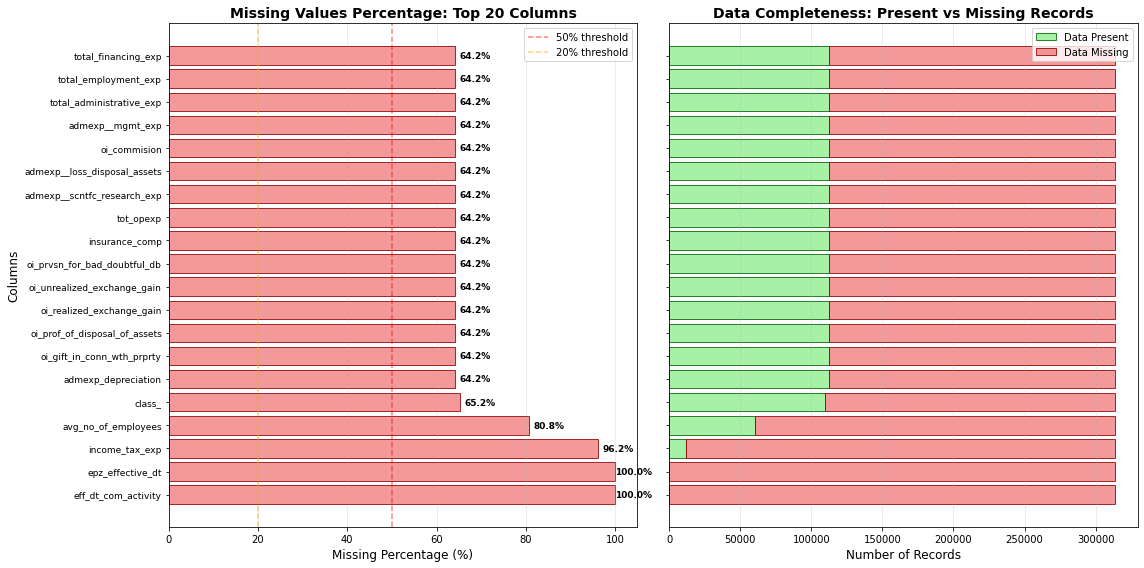


Summary of Top 20 Columns with Missing Values:
------------------------------------------------------------
• Average missing percentage: 70.2%
• Columns with >50% missing: 20
• Columns with >20% missing: 20
• Most missing column: eff_dt_com_activity (100.0% missing)
• Least missing (of top 20): admexp_depreciation (64.2% missing)

2. Business Type Distribution
------------------------------


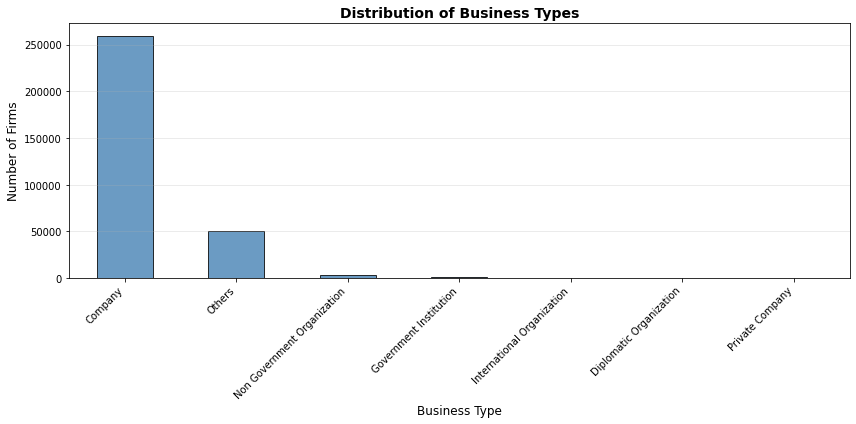

• Total business types: 7
• Top 3: Company (259,766), Others (50,331), Non Government Organization (2,955)
• These 3 types represent: 99.7% of all firms

3. Filing Completeness by Business Type
------------------------------


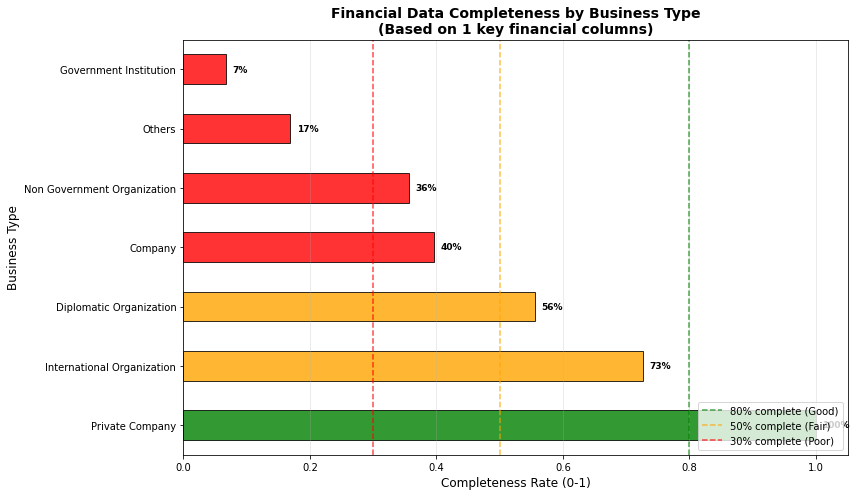


Analysis based on 1 key financial columns:
Key columns used: ['gross_profit'] 
------------------------------------------------------------
• High compliance (>80% complete): 1 business types
  Top performers:
    ✓ Private Company: 100.0% complete

• Medium compliance (50-80% complete): 2 business types

• Low compliance (<50% complete): 4 business types
  Needs attention:
    ✗ Government Institution: 6.8% complete
    ✗ Others: 16.9% complete
    ✗ Non Government Organization: 35.6% complete

• Overall completeness rate: 46.7%


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. MISSING DATA ANALYSIS 
print("1. Missing Data Patterns")
print("-" * 30)

# Get top 20 columns with missing values
top_missing = cols_with_missing.sort_values('Missing_Percent', ascending=False).head(20)

# Fix: Check if Missing_Percent values are already multiplied by 100
# If average is > 100, they're likely already percentages
if top_missing['Missing_Percent'].mean() > 1:
    # Convert from percentage (like 70.5) to decimal (0.705)
    top_missing = top_missing.copy()
    top_missing['Missing_Percent'] = top_missing['Missing_Percent'] / 100

# Calculate missing counts if not already in the DataFrame
if 'Missing_Count' not in top_missing.columns or 'Non_Missing_Count' not in top_missing.columns:
    # Calculate missing counts for each column
    missing_counts = []
    non_missing_counts = []
    total_counts = []
    
    for col in top_missing.index:
        missing_count = df[col].isnull().sum()
        non_missing_count = df[col].notnull().sum()
        total_count = len(df)
        
        missing_counts.append(missing_count)
        non_missing_counts.append(non_missing_count)
        total_counts.append(total_count)
    
    # Add these columns to top_missing
    top_missing = top_missing.copy()
    top_missing['Missing_Count'] = missing_counts
    top_missing['Non_Missing_Count'] = non_missing_counts
    top_missing['Total_Count'] = total_counts

# Bar chart visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Left: Missing percentages (horizontal bar chart)
missing_pct = top_missing['Missing_Percent'] * 100  # Convert to percentage for display
bars1 = axes[0].barh(range(len(missing_pct)), missing_pct.values, 
                     color='lightcoral', edgecolor='darkred', alpha=0.8)
axes[0].set_title('Missing Values Percentage: Top 20 Columns', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Missing Percentage (%)', fontsize=12)
axes[0].set_ylabel('Columns', fontsize=12)
axes[0].set_yticks(range(len(missing_pct)))
axes[0].set_yticklabels(missing_pct.index, fontsize=9)
axes[0].grid(axis='x', alpha=0.3)
axes[0].axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
axes[0].axvline(x=20, color='orange', linestyle='--', alpha=0.5, label='20% threshold')
axes[0].legend()

# Add value labels
for i, (bar, pct) in enumerate(zip(bars1, missing_pct.values)):
    axes[0].text(min(pct + 1, 100), bar.get_y() + bar.get_height()/2, 
                 f'{pct:.1f}%', va='center', fontweight='bold', fontsize=9)

# Right: Stacked bar chart (Present vs Missing counts)
bars_present = axes[1].barh(range(len(top_missing)), top_missing['Non_Missing_Count'].values,
                           color='lightgreen', edgecolor='darkgreen', label='Data Present', alpha=0.8)
bars_missing = axes[1].barh(range(len(top_missing)), top_missing['Missing_Count'].values,
                           left=top_missing['Non_Missing_Count'].values,
                           color='lightcoral', edgecolor='darkred', label='Data Missing', alpha=0.8)
axes[1].set_title('Data Completeness: Present vs Missing Records', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Records', fontsize=12)
axes[1].set_yticks(range(len(top_missing)))
axes[1].set_yticklabels([])  # Hide duplicate labels
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary of Top 20 Columns with Missing Values:")
print("-" * 60)
print(f"• Average missing percentage: {missing_pct.mean():.1f}%")
print(f"• Columns with >50% missing: {len(missing_pct[missing_pct > 50])}")
print(f"• Columns with >20% missing: {len(missing_pct[missing_pct > 20])}")
print(f"• Most missing column: {missing_pct.idxmax()} ({missing_pct.max():.1f}% missing)")
print(f"• Least missing (of top 20): {missing_pct.idxmin()} ({missing_pct.min():.1f}% missing)")

# 2. BUSINESS TYPE DISTRIBUTION
print("\n2. Business Type Distribution")
print("-" * 30)

plt.figure(figsize=(12, 6))
business_counts = df['business_type'].value_counts()
business_counts.plot(kind='bar', color='steelblue', edgecolor='black', alpha=0.8)
plt.title('Distribution of Business Types', fontsize=14, fontweight='bold')
plt.xlabel('Business Type', fontsize=12)
plt.ylabel('Number of Firms', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"• Total business types: {len(business_counts)}")
print(f"• Top 3: {business_counts.index[0]} ({business_counts.iloc[0]:,}), "
      f"{business_counts.index[1]} ({business_counts.iloc[1]:,}), "
      f"{business_counts.index[2]} ({business_counts.iloc[2]:,})")
print(f"• These 3 types represent: {100*(business_counts.iloc[:3].sum()/len(df)):.1f}% of all firms")

# 3. FILING COMPLETENESS BY BUSINESS TYPE 
print("\n3. Filing Completeness by Business Type")
print("-" * 30)

# Check key financial columns 
key_financial_columns = [
    'total_revenue', 'total_assets', 'net_income', 'total_liabilities',
    'gross_profit', 'operating_income', 'total_equity', 'current_assets',
    'current_liabilities', 'cash_flow_operations'
]

# Find which of these columns exist in the dataframe
existing_key_cols = [col for col in key_financial_columns if col in df.columns]

if len(existing_key_cols) > 0:
    # Calculate completeness for each business type
    # Create a completeness score: percentage of key columns that are not null
    completeness_by_type = {}
    
    for biz_type in df['business_type'].unique():
        subset = df[df['business_type'] == biz_type]
        
        # Calculate percentage of key columns that have data for each firm
        completeness_scores = []
        for idx, row in subset.iterrows():
            # Count how many key columns have data (not null)
            non_null_count = sum(1 for col in existing_key_cols if pd.notna(row[col]))
            completeness = non_null_count / len(existing_key_cols) if len(existing_key_cols) > 0 else 0
            completeness_scores.append(completeness)
        
        # Average completeness for this business type
        completeness_by_type[biz_type] = np.mean(completeness_scores) if completeness_scores else 0
    
    # Convert to Series and sort
    filing_by_type = pd.Series(completeness_by_type).sort_values(ascending=False)
    
    # Plot
    plt.figure(figsize=(12, 7))
    colors = ['green' if x > 0.8 else 'orange' if x > 0.5 else 'red' for x in filing_by_type.values]
    bars3 = filing_by_type.plot(kind='barh', color=colors, edgecolor='black', alpha=0.8, figsize=(12, 7))
    plt.title(f'Financial Data Completeness by Business Type\n(Based on {len(existing_key_cols)} key financial columns)', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Completeness Rate (0-1)', fontsize=12)
    plt.ylabel('Business Type', fontsize=12)
    plt.axvline(x=0.8, color='green', linestyle='--', alpha=0.7, linewidth=1.5, label='80% complete (Good)')
    plt.axvline(x=0.5, color='orange', linestyle='--', alpha=0.7, linewidth=1.5, label='50% complete (Fair)')
    plt.axvline(x=0.3, color='red', linestyle='--', alpha=0.7, linewidth=1.5, label='30% complete (Poor)')
    plt.legend(loc='lower right')
    plt.grid(axis='x', alpha=0.3)
    
    # Add percentage labels to bars
    for i, (bar, rate) in enumerate(zip(bars3.patches, filing_by_type.values)):
        completeness_pct = 100 * rate
        if bar.get_width() > 0:  # Only label if bar has width
            plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                     f'{completeness_pct:.0f}%', va='center', fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print compliance analysis
    print(f"\nAnalysis based on {len(existing_key_cols)} key financial columns:")
    print("Key columns used:", existing_key_cols[:5], "..." if len(existing_key_cols) > 5 else "")
    print("-" * 60)
    
    high_compliance = filing_by_type[filing_by_type > 0.8]
    medium_compliance = filing_by_type[(filing_by_type >= 0.5) & (filing_by_type <= 0.8)]
    low_compliance = filing_by_type[filing_by_type < 0.5]
    
    print(f"• High compliance (>80% complete): {len(high_compliance)} business types")
    if len(high_compliance) > 0:
        print("  Top performers:")
        for biz_type, rate in high_compliance.head(3).items():
            print(f"    ✓ {biz_type}: {100*rate:.1f}% complete")
    
    print(f"\n• Medium compliance (50-80% complete): {len(medium_compliance)} business types")
    
    print(f"\n• Low compliance (<50% complete): {len(low_compliance)} business types")
    if len(low_compliance) > 0:
        print("  Needs attention:")
        for biz_type, rate in low_compliance.sort_values().head(3).items():
            print(f"    ✗ {biz_type}: {100*rate:.1f}% complete")
    
    print(f"\n• Overall completeness rate: {100*filing_by_type.mean():.1f}%")
    
else:
    print("Warning: No standard key financial columns found in dataset.")
    print("Consider creating a custom 'MISSING_KEY_DATA' column or specifying your key columns.")
    
    # Alternative: Show missing rate for a sample column
    sample_col = df.select_dtypes(include=[np.number]).columns[0] if len(df.select_dtypes(include=[np.number]).columns) > 0 else df.columns[0]
    print(f"\nShowing completeness for sample column '{sample_col}':")
    
    filing_by_type = df.groupby('business_type')[sample_col].apply(lambda x: x.notnull().mean()).sort_values()
    
    plt.figure(figsize=(12, 7))
    colors = ['green' if x > 0.8 else 'orange' if x > 0.5 else 'red' for x in filing_by_type.values]
    filing_by_type.plot(kind='barh', color=colors, edgecolor='black', alpha=0.8)
    plt.title(f"Data Completeness by Business Type\n(Based on column: {sample_col})", fontsize=14, fontweight='bold')
    plt.xlabel('Completeness Rate', fontsize=12)
    plt.ylabel('Business Type', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

### FILING BEHAVIOR ANALYSIS


In [3]:
# Check if missingness is systematic
df['MISSING_KEY_DATA'] = df[['profit_loss_before_tax', 'grossturnover']].isnull().all(axis=1).astype(int)
missing_rate = df['MISSING_KEY_DATA'].mean() * 100
print(f"• Firms missing ALL key financials: {missing_rate:.1f}%")

# Analyze by business type
if 'business_type' in df.columns:
    print(f"\n• Missing rate by business type:")
    missing_by_type = df.groupby('business_type')['MISSING_KEY_DATA'].mean() * 100
    print(missing_by_type.sort_values(ascending=False))

• Firms missing ALL key financials: 64.2%

• Missing rate by business type:
business_type
Government Institution         93.178893
Others                         83.097892
Non Government Organization    64.365482
Company                        60.395125
Diplomatic Organization        44.444444
International Organization     27.272727
Private Company                 0.000000
Name: MISSING_KEY_DATA, dtype: float64


### DATA PREPARATION


In [4]:
# 1. CREATE COMPLETE DATA SUBSET (Based on missing values analysis)
print("1. Creating Modeling Subset (Complete Financial Data)")
print("-" * 40)

# Identify firms with complete key financial data
key_financials = ['profit_loss_before_tax', 'grossturnover', 'gross_profit']
df['HAS_COMPLETE_FINANCIALS'] = df[key_financials].notna().all(axis=1).astype(int)

complete_mask = df['HAS_COMPLETE_FINANCIALS'] == 1
df_model = df[complete_mask].copy()

print(f"• Original dataset: {len(df):,} firms")
print(f"• Modeling subset:  {len(df_model):,} firms ({len(df_model)/len(df)*100:.1f}%)")
print(f"• Business types retained:")
print(df_model['business_type'].value_counts())
print()

# 2. CREATE TARGET VARIABLE
print("2. Creating Target Variable (LOSS_FLAG)")
df_model['LOSS_FLAG'] = (df_model['profit_loss_before_tax'] < 0).astype(int)
loss_rate = df_model['LOSS_FLAG'].mean() * 100
print(f"   • Loss rate in modeling subset: {loss_rate:.1f}% ({df_model['LOSS_FLAG'].sum():,} firms)")
print(f"   • Distribution: {df_model['LOSS_FLAG'].value_counts().to_dict()}")
print()

# 3. FEATURE ENGINEERING
print("3. Engineering Financial Ratios")
print("-" * 25)

def safe_divide(num, denom):
    return np.where(denom != 0, num / denom, np.nan)

ratios_created = []
if 'grossturnover' in df_model.columns:
    # Profitability ratios
    df_model['PROFIT_MARGIN'] = safe_divide(df_model['profit_loss_before_tax'], df_model['grossturnover'])
    ratios_created.append('PROFIT_MARGIN')
    
    df_model['GROSS_MARGIN'] = safe_divide(df_model['gross_profit'], df_model['grossturnover'])
    ratios_created.append('GROSS_MARGIN')
    
    # Cost structure ratios
    if 'total_employment_exp' in df_model.columns:
        df_model['EMPLOYMENT_COST_RATIO'] = safe_divide(df_model['total_employment_exp'], df_model['grossturnover'])
        ratios_created.append('EMPLOYMENT_COST_RATIO')
    
    if 'cost_of_sales' in df_model.columns:
        df_model['COST_OF_SALES_RATIO'] = safe_divide(df_model['cost_of_sales'], df_model['grossturnover'])
        ratios_created.append('COST_OF_SALES_RATIO')

print(f"   • Created {len(ratios_created)} financial ratios:")
for ratio in ratios_created:
    non_null = df_model[ratio].notna().sum()
    print(f"     - {ratio}: {non_null:,} values")
print()

# 4. DATA CLEANING
print("4. Cleaning Data")
print("-" * 25)

# 4.1 Check for duplicates in modeling subset
print("4.1 Checking for duplicates...")
duplicate_count = df_model.duplicated().sum()
if duplicate_count > 0:
    print(f"   • Found {duplicate_count:,} duplicates ({duplicate_count/len(df_model)*100:.2f}%)")
    df_model = df_model.drop_duplicates()
    print(f"   • Removed. New shape: {df_model.shape[0]:,} rows")
else:
    print("   • No duplicates found")
print()

# 4.2 Winsorize financial ratios (1st-99th percentile)
print("4.2 Winsorizing financial ratios...")
for ratio in ratios_created:
    if df_model[ratio].notna().sum() > 0:
        lower = df_model[ratio].quantile(0.01)
        upper = df_model[ratio].quantile(0.99)
        df_model[ratio] = df_model[ratio].clip(lower=lower, upper=upper)
        print(f"   • {ratio}: [{lower:.3f}, {upper:.3f}]")
print("   • Winsorization complete")
print()

# 4.3 Handle missing values in ratios
print("4.3 Handling missing values...")
for ratio in ratios_created:
    missing = df_model[ratio].isna().sum()
    if missing > 0:
        df_model[ratio] = df_model[ratio].fillna(0)
        print(f"   • {ratio}: {missing:,} NaN → 0")
print()

# 5. MULTICOLLINEARITY CHECK (VIF)
print("5. Checking Multicollinearity (VIF)")
print("-" * 25)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='statsmodels')

# Define features for modeling
features = ratios_created + ['grossturnover', 'gross_profit']
features = [f for f in features if f in df_model.columns]

print(f"   • Analyzing {len(features)} features for multicollinearity:")
for feat in features:
    print(f"     - {feat}")

# Prepare data for VIF
X_vif = df_model[features].fillna(0)

if len(X_vif.columns) > 1:
    X_vif_const = add_constant(X_vif)
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_vif_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i) 
                       for i in range(len(X_vif_const.columns))]
    
    # Check results
    high_vif = vif_data[vif_data['VIF'] > 10]
    if len(high_vif) > 0:
        print(f"\n   Found {len(high_vif)} features with VIF > 10:")
        display(high_vif.sort_values('VIF', ascending=False))
        print("   • Solution: Will use LASSO regularization")
    else:
        print(f"\n   ✓ No severe multicollinearity (all VIF < 10)")
    
    print(f"\n   VIF Summary:")
    print(f"   • Max VIF: {vif_data['VIF'].max():.1f}")
    print(f"   • Min VIF: {vif_data['VIF'].min():.1f}")
    print(f"   • Mean VIF: {vif_data['VIF'].mean():.1f}")
    print(f"   • Features with VIF > 5: {(vif_data['VIF'] > 5).sum()}")
else:
    print("   • Not enough features for VIF check")

print()

# 6. PREPARE FOR MODELING
print("6. Preparing for Modeling")
print("-" * 25)

# Final feature set
model_features = features.copy()

# Add categorical variables if needed
categorical_vars = ['business_type', 'business_subtype', 'return_type', 'assmt_type']
for cat_var in categorical_vars:
    if cat_var in df_model.columns and df_model[cat_var].nunique() > 1:
        model_features.append(cat_var)
        print(f"   • Added categorical: {cat_var}")

print(f"\n   Final feature set: {len(model_features)} variables")
print(f"   • Target: LOSS_FLAG (loss rate: {loss_rate:.1f}%)")
print(f"   • Dataset ready: {df_model.shape[0]:,} firms")


1. Creating Modeling Subset (Complete Financial Data)
----------------------------------------
• Original dataset: 313,870 firms
• Modeling subset:  112,520 firms (35.8%)
• Business types retained:
Company                        102880
Others                           8507
Non Government Organization      1053
Government Institution             53
International Organization         16
Diplomatic Organization            10
Private Company                     1
Name: business_type, dtype: int64

2. Creating Target Variable (LOSS_FLAG)
   • Loss rate in modeling subset: 39.5% (44,407 firms)
   • Distribution: {0: 68113, 1: 44407}

3. Engineering Financial Ratios
-------------------------
   • Created 4 financial ratios:
     - PROFIT_MARGIN: 99,511 values
     - GROSS_MARGIN: 99,511 values
     - EMPLOYMENT_COST_RATIO: 99,511 values
     - COST_OF_SALES_RATIO: 99,511 values

4. Cleaning Data
-------------------------
4.1 Checking for duplicates...
   • Found 28 duplicates (0.02%)
   • Rem

### Additiona Financial Ratios

In [5]:
# 3.1 ADDITIONAL FINANCIAL RATIOS 
print("3.1 Additional Financial Ratios")
print("-" * 20)

# Employment intensity (employees per turnover unit) - Keep this one
if 'avg_no_of_employees' in df_model.columns:
    df_model['EMPLOYMENT_INTENSITY'] = safe_divide(
        df_model['avg_no_of_employees'], 
        df_model['grossturnover']
    )
    ratios_created.append('EMPLOYMENT_INTENSITY')
    print(f"   ✓ Added EMPLOYMENT_INTENSITY ratio")

# OPERATING EFFICIENCY RATIO - Create from available components
# Since you don't have 'tot_op_exp', let's approximate from what you have
operating_components = ['total_employment_exp', 'admexp__loss_disposal_assets', 
                       'odc_tot_of_other_direct_costs', 'total_other_income']

# Check which components exist in your data
available_components = [col for col in operating_components if col in df_model.columns]

if len(available_components) > 0 and 'grossturnover' in df_model.columns:
    # Create approximate operating expenses
    df_model['approx_operating_exp'] = df_model[available_components].sum(axis=1)
    df_model['OPERATING_EFFICIENCY'] = safe_divide(
        df_model['approx_operating_exp'],
        df_model['grossturnover']
    )
    ratios_created.append('OPERATING_EFFICIENCY')
    print(f"   ✓ Added OPERATING_EFFICIENCY ratio (using {len(available_components)} components)")

# TAX BURDEN RATIO - You have income_tax_exp
if 'income_tax_exp' in df_model.columns:
    df_model['TAX_BURDEN_RATIO'] = safe_divide(
        df_model['income_tax_exp'],
        df_model['grossturnover']
    )
    ratios_created.append('TAX_BURDEN_RATIO')
    print(f"   ✓ Added TAX_BURDEN_RATIO")

# OTHER INCOME RATIO - You have total_other_income
if 'total_other_income' in df_model.columns:
    df_model['OTHER_INCOME_RATIO'] = safe_divide(
        df_model['total_other_income'],
        df_model['grossturnover']
    )
    ratios_created.append('OTHER_INCOME_RATIO')
    print(f"   ✓ Added OTHER_INCOME_RATIO")

# DIRECT COST RATIO - You have odc_tot_of_other_direct_costs
if 'odc_tot_of_other_direct_costs' in df_model.columns:
    df_model['DIRECT_COST_RATIO'] = safe_divide(
        df_model['odc_tot_of_other_direct_costs'],
        df_model['grossturnover']
    )
    ratios_created.append('DIRECT_COST_RATIO')
    print(f"   ✓ Added DIRECT_COST_RATIO")
    
print(f"   • Total ratios created: {len(ratios_created)}")
print(f"   • Ratios: {', '.join(ratios_created)}")
print()

3.1 Additional Financial Ratios
--------------------
   ✓ Added EMPLOYMENT_INTENSITY ratio
   ✓ Added OPERATING_EFFICIENCY ratio (using 4 components)
   ✓ Added TAX_BURDEN_RATIO
   ✓ Added OTHER_INCOME_RATIO
   ✓ Added DIRECT_COST_RATIO
   • Total ratios created: 9
   • Ratios: PROFIT_MARGIN, GROSS_MARGIN, EMPLOYMENT_COST_RATIO, COST_OF_SALES_RATIO, EMPLOYMENT_INTENSITY, OPERATING_EFFICIENCY, TAX_BURDEN_RATIO, OTHER_INCOME_RATIO, DIRECT_COST_RATIO



In [6]:
# 4.2.1 Winsorize NEW ratios
print("4.2.1 Winsorizing additional financial ratios...")

new_ratios = ['EMPLOYMENT_INTENSITY', 'OPERATING_EFFICIENCY', 'TAX_BURDEN_RATIO', 
              'OTHER_INCOME_RATIO', 'DIRECT_COST_RATIO']

for ratio in new_ratios:
    if ratio in df_model.columns and df_model[ratio].notna().sum() > 0:
        lower = df_model[ratio].quantile(0.01)
        upper = df_model[ratio].quantile(0.99)
        df_model[ratio] = df_model[ratio].clip(lower=lower, upper=upper)
        print(f"   • {ratio}: [{lower:.3f}, {upper:.3f}]")

print("   • Additional winsorization complete")
print()

4.2.1 Winsorizing additional financial ratios...
   • EMPLOYMENT_INTENSITY: [0.000, 1.000]
   • OPERATING_EFFICIENCY: [0.000, 5.712]
   • TAX_BURDEN_RATIO: [0.000, 1.000]
   • OTHER_INCOME_RATIO: [0.000, 2.024]
   • DIRECT_COST_RATIO: [0.000, 1.126]
   • Additional winsorization complete



### EDA: UNIVARIATE, BIVARIATE & OUTLIER ANALYSIS

1. UNIVARIATE ANALYSIS: Distributions of ALL Financial Ratios
--------------------------------------------------
Analyzing 9 financial ratios:
  • PROFIT_MARGIN: 112,492 valid values (100.0%)
  • GROSS_MARGIN: 112,492 valid values (100.0%)
  • EMPLOYMENT_COST_RATIO: 112,492 valid values (100.0%)
  • COST_OF_SALES_RATIO: 112,492 valid values (100.0%)
  • EMPLOYMENT_INTENSITY: 41,032 valid values (36.5%)
  • OPERATING_EFFICIENCY: 99,491 valid values (88.4%)
  • TAX_BURDEN_RATIO: 10,645 valid values (9.5%)
  • OTHER_INCOME_RATIO: 99,491 valid values (88.4%)
  • DIRECT_COST_RATIO: 99,491 valid values (88.4%)


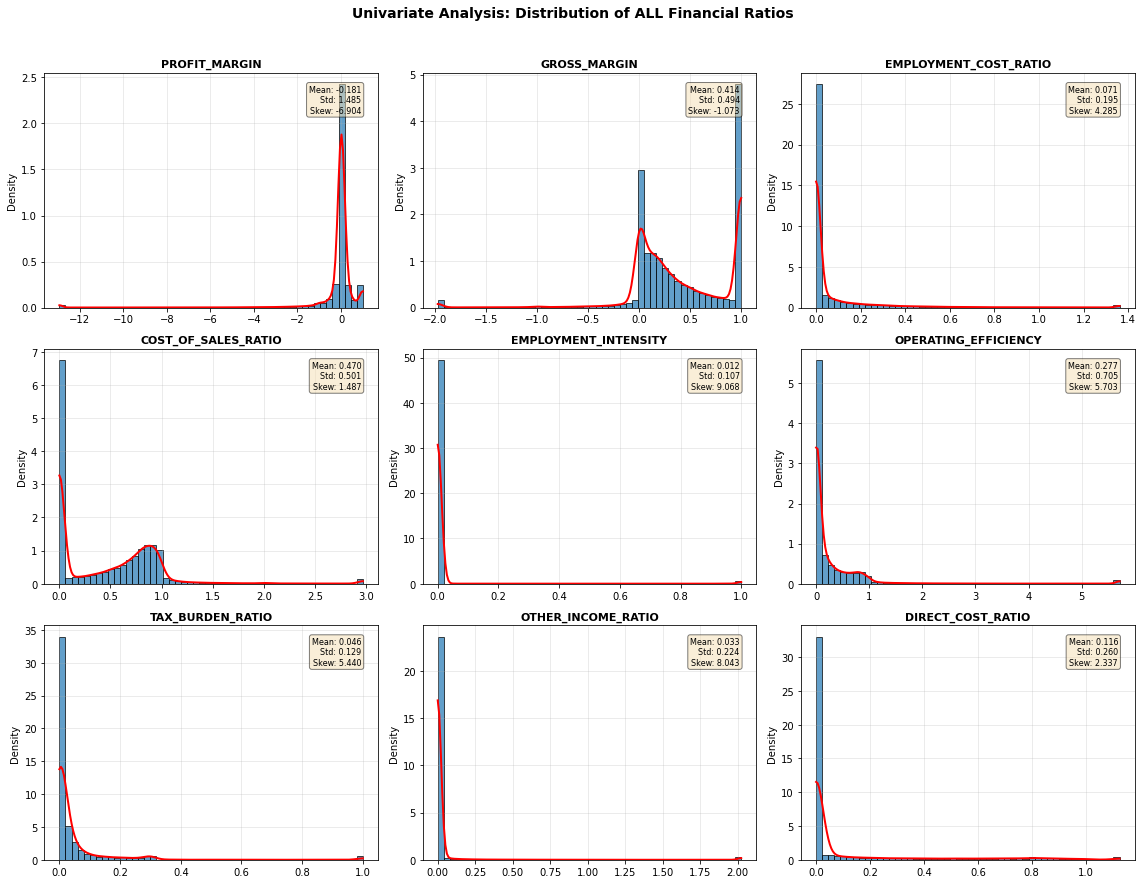


2. BIVARIATE ANALYSIS: Correlation Matrix of ALL Financial Ratios
--------------------------------------------------


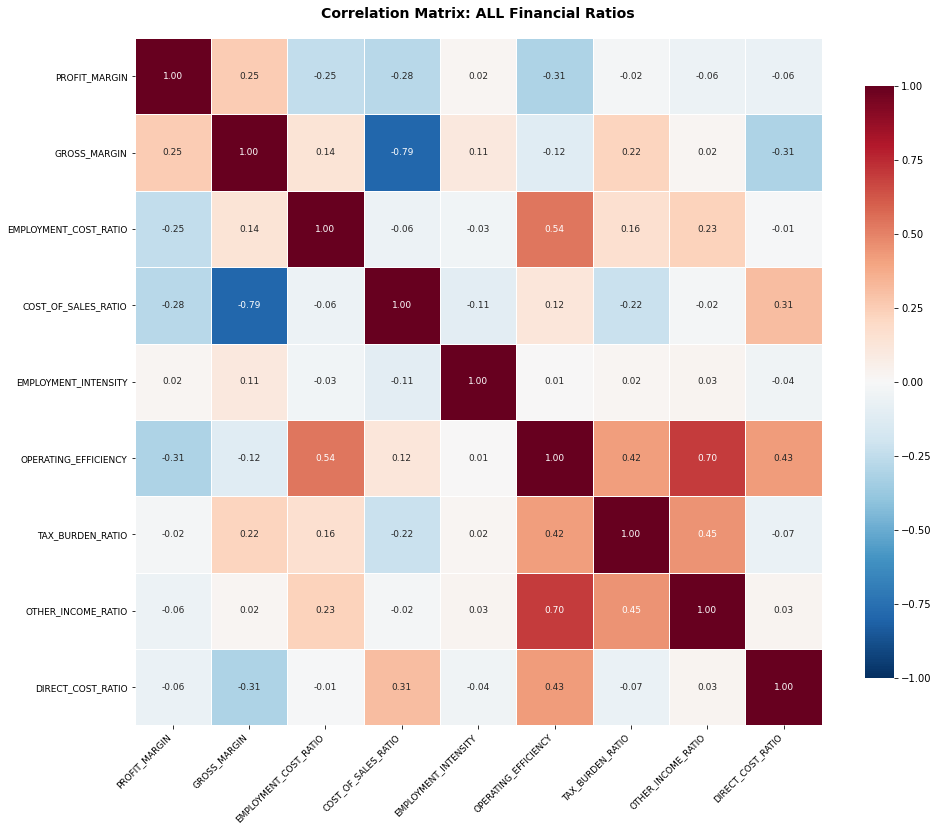

CORRELATION ANALYSIS:
----------------------------------------
STRONG POSITIVE CORRELATIONS (r > 0.7):
  • OPERATING_EFFICIENCY ↔ OTHER_INCOME_RATIO: 0.702

STRONG NEGATIVE CORRELATIONS (r < -0.7):
  • GROSS_MARGIN ↔ COST_OF_SALES_RATIO: -0.794

3. OUTLIER DETECTION: Summary for All Ratios (IQR Method)
--------------------------------------------------
Outlier Summary Table:
----------------------------------------------------------------------
Ratio                        Valid   Outliers    Outlier %        IQR               Bounds
----------------------------------------------------------------------
🚨 PROFIT_MARGIN            112,492     29,556        26.3%      0.103      [-0.174, 0.237]
🚨 DIRECT_COST_RATIO         99,491     21,930        22.0%      0.030      [-0.044, 0.074]
⚠️ EMPLOYMENT_COST_RATIO    112,492     21,422        19.0%      0.030      [-0.045, 0.075]
⚠️ TAX_BURDEN_RATIO          10,645      1,421        13.3%      0.032      [-0.048, 0.079]
⚠️ EMPLOYMENT_INTENSITY

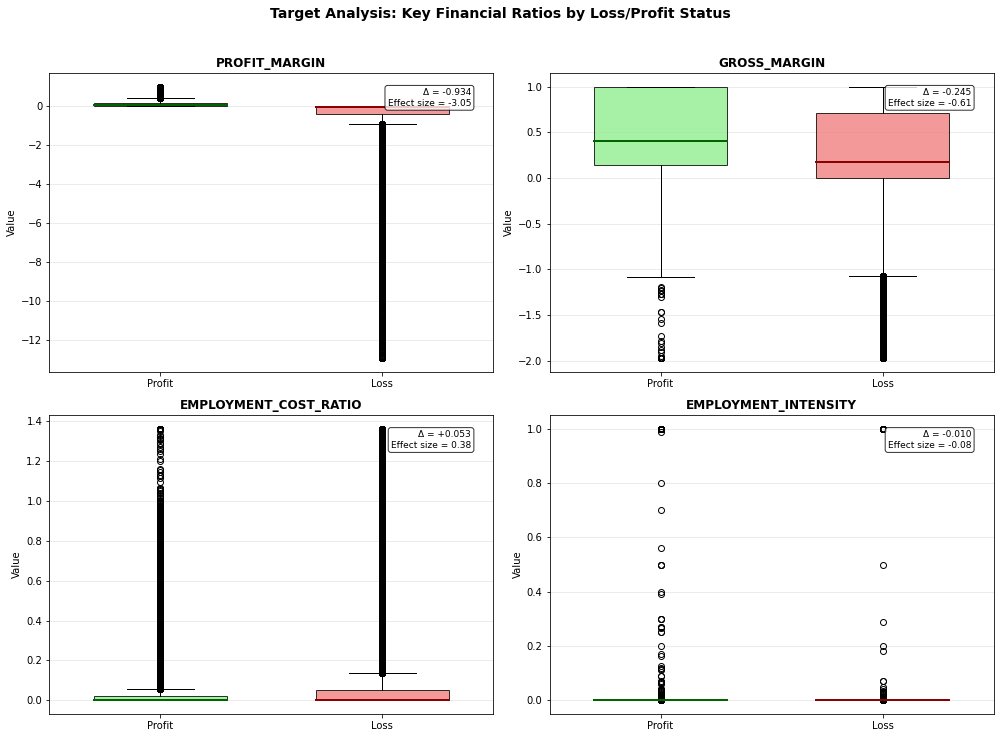


5. STATISTICAL SUMMARY AND INSIGHTS
A. COMPARISON OF ALL RATIOS BETWEEN PROFIT AND LOSS FIRMS:
------------------------------------------------------------
                Ratio  Profit Mean  Loss Mean  Difference  % Change p-value Significant
        PROFIT_MARGIN        0.188     -0.746      -0.934  -497.088  0.0000       ✓ YES
         GROSS_MARGIN        0.511      0.266      -0.245   -48.008  0.0000       ✓ YES
 OPERATING_EFFICIENCY        0.220      0.379       0.160    72.565  0.0000       ✓ YES
  COST_OF_SALES_RATIO        0.423      0.542       0.118    27.914  0.0000       ✓ YES
EMPLOYMENT_COST_RATIO        0.050      0.103       0.053   106.194  0.0000       ✓ YES
    DIRECT_COST_RATIO        0.103      0.140       0.037    36.106  0.0000       ✓ YES
     TAX_BURDEN_RATIO        0.049      0.035      -0.014   -28.168  0.0000       ✓ YES
 EMPLOYMENT_INTENSITY        0.016      0.005      -0.010   -66.299  0.0000       ✓ YES
   OTHER_INCOME_RATIO        0.035      0.030      

TypeError: nlargest() got an unexpected keyword argument 'key'

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

# 1. UNIVARIATE: DISTRIBUTIONS OF ALL FINANCIAL RATIOS
print("1. UNIVARIATE ANALYSIS: Distributions of ALL Financial Ratios")
print("-" * 50)

# Get ALL financial ratios you've created
all_ratios = ['PROFIT_MARGIN', 'GROSS_MARGIN', 'EMPLOYMENT_COST_RATIO', 'COST_OF_SALES_RATIO',
              'EMPLOYMENT_INTENSITY', 'OPERATING_EFFICIENCY', 'TAX_BURDEN_RATIO', 
              'OTHER_INCOME_RATIO', 'DIRECT_COST_RATIO']

# Filter to only ratios that exist in your data
all_ratios = [ratio for ratio in all_ratios if ratio in df_model.columns]

print(f"Analyzing {len(all_ratios)} financial ratios:")
for ratio in all_ratios:
    non_null = df_model[ratio].notna().sum()
    pct_valid = non_null / len(df_model) * 100
    print(f"  • {ratio}: {non_null:,} valid values ({pct_valid:.1f}%)")

# Create subplots - 3x3 grid for up to 9 ratios
n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))

for idx, ratio in enumerate(all_ratios[:9]):  # Show up to 9 ratios
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col]
    
    # Get data for this ratio
    ratio_data = df_model[ratio].dropna()
    
    if len(ratio_data) > 0:
        # Histogram with density curve
        n, bins, patches = ax.hist(ratio_data, bins=50, 
                                   edgecolor='black', alpha=0.7, density=True)
        
        # Add density curve
        kde = stats.gaussian_kde(ratio_data)
        x_vals = np.linspace(bins[0], bins[-1], 200)
        ax.plot(x_vals, kde(x_vals), 'r-', linewidth=2)
        
        ax.set_title(f'{ratio}', fontsize=11, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('Density')
        ax.grid(True, alpha=0.3)
        
        # Add statistics box
        mean_val = ratio_data.mean()
        std_val = ratio_data.std()
        skew_val = ratio_data.skew()
        
        stats_text = f"Mean: {mean_val:.3f}\nStd: {std_val:.3f}\nSkew: {skew_val:.3f}"
        ax.text(0.95, 0.95, stats_text, transform=ax.transAxes,
                fontsize=8, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    else:
        ax.text(0.5, 0.5, f'No data for {ratio}', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{ratio} (No Data)', fontsize=11)

# Hide empty subplots if we have less than 9 ratios
for idx in range(len(all_ratios), n_rows * n_cols):
    row = idx // n_cols
    col = idx % n_cols
    axes[row, col].axis('off')

plt.suptitle('Univariate Analysis: Distribution of ALL Financial Ratios', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 2. BIVARIATE: CORRELATION ANALYSIS OF ALL RATIOS
print("\n2. BIVARIATE ANALYSIS: Correlation Matrix of ALL Financial Ratios")
print("-" * 50)

# Calculate correlations for all ratios
corr_matrix_all = df_model[all_ratios].corr()

# Create heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_all, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            annot_kws={"size": 9}, vmin=-1, vmax=1)
plt.title('Correlation Matrix: ALL Financial Ratios', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

# Highlight correlations
print("CORRELATION ANALYSIS:")
print("-" * 40)

# Strong positive correlations (> 0.7)
print("STRONG POSITIVE CORRELATIONS (r > 0.7):")
strong_pos = []
for i in range(len(corr_matrix_all.columns)):
    for j in range(i+1, len(corr_matrix_all.columns)):
        corr = corr_matrix_all.iloc[i, j]
        if corr > 0.7:
            strong_pos.append((corr_matrix_all.columns[i], corr_matrix_all.columns[j], corr))

if strong_pos:
    for col1, col2, corr in strong_pos:
        print(f"  • {col1} ↔ {col2}: {corr:.3f}")
else:
    print("  • None found")

# Strong negative correlations (< -0.7)
print("\nSTRONG NEGATIVE CORRELATIONS (r < -0.7):")
strong_neg = []
for i in range(len(corr_matrix_all.columns)):
    for j in range(i+1, len(corr_matrix_all.columns)):
        corr = corr_matrix_all.iloc[i, j]
        if corr < -0.7:
            strong_neg.append((corr_matrix_all.columns[i], corr_matrix_all.columns[j], corr))

if strong_neg:
    for col1, col2, corr in strong_neg:
        print(f"  • {col1} ↔ {col2}: {corr:.3f}")
else:
    print("  • None found")

# 3. OUTLIER DETECTION: SUMMARY FOR ALL RATIOS
print("\n3. OUTLIER DETECTION: Summary for All Ratios (IQR Method)")
print("-" * 50)

# Create outlier summary table
outlier_data = []
for ratio in all_ratios:
    ratio_data = df_model[ratio].dropna()
    
    if len(ratio_data) > 0:
        Q1 = ratio_data.quantile(0.25)
        Q3 = ratio_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ratio_data[(ratio_data < lower_bound) | (ratio_data > upper_bound)]
        outlier_pct = len(outliers) / len(ratio_data) * 100
        
        outlier_data.append({
            'Ratio': ratio,
            'Valid': len(ratio_data),
            'Outliers': len(outliers),
            'Outlier %': outlier_pct,
            'IQR': IQR,
            'Bounds': f"[{lower_bound:.3f}, {upper_bound:.3f}]"
        })
    else:
        outlier_data.append({
            'Ratio': ratio,
            'Valid': 0,
            'Outliers': 0,
            'Outlier %': 0,
            'IQR': 0,
            'Bounds': "No data"
        })

# Convert to DataFrame
outlier_df = pd.DataFrame(outlier_data).sort_values('Outlier %', ascending=False)

print("Outlier Summary Table:")
print("-" * 70)
print(f"{'Ratio':25} {'Valid':>8} {'Outliers':>10} {'Outlier %':>12} {'IQR':>10} {'Bounds':>20}")
print("-" * 70)

for _, row in outlier_df.iterrows():
    if row['Valid'] > 0:
        outlier_level = "🚨" if row['Outlier %'] > 20 else "⚠️" if row['Outlier %'] > 10 else "✓"
        print(f"{outlier_level} {row['Ratio']:23} {row['Valid']:8,} {row['Outliers']:10,} {row['Outlier %']:11.1f}% {row['IQR']:10.3f} {row['Bounds']:>20}")

print()

# 4. TARGET ANALYSIS: LOSS VS PROFIT FOR TOP 4 RATIOS
print("\n4. TARGET ANALYSIS: Loss vs Profit Firms (Top 4 Ratios)")
print("-" * 50)

# Select 4 key ratios for detailed comparison
key_ratios = ['PROFIT_MARGIN', 'GROSS_MARGIN', 'EMPLOYMENT_COST_RATIO', 'EMPLOYMENT_INTENSITY']
key_ratios = [ratio for ratio in key_ratios if ratio in df_model.columns]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for idx, ratio in enumerate(key_ratios[:4]):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Get data for profit and loss firms
    profit_data = df_model[df_model['LOSS_FLAG'] == 0][ratio].dropna()
    loss_data = df_model[df_model['LOSS_FLAG'] == 1][ratio].dropna()
    
    if len(profit_data) > 0 and len(loss_data) > 0:
        # Create side-by-side box plots
        box_data = [profit_data, loss_data]
        bp = ax.boxplot(box_data, patch_artist=True, labels=['Profit', 'Loss'], widths=0.6)
        
        # Color boxes
        colors = ['lightgreen', 'lightcoral']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.8)
        
        # Customize median line
        bp['medians'][0].set_color('darkgreen')
        bp['medians'][1].set_color('darkred')
        bp['medians'][0].set_linewidth(2)
        bp['medians'][1].set_linewidth(2)
        
        ax.set_title(f'{ratio}', fontsize=12, fontweight='bold')
        ax.set_ylabel('Value')
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add statistics
        profit_mean = profit_data.mean()
        loss_mean = loss_data.mean()
        difference = loss_mean - profit_mean
        effect_size = difference / profit_data.std() if profit_data.std() > 0 else 0
        
        stats_text = f"Δ = {difference:+.3f}\nEffect size = {effect_size:.2f}"
        ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, fontsize=9,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    else:
        ax.text(0.5, 0.5, f'Insufficient data for {ratio}', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{ratio} (No Data)', fontsize=12)

plt.suptitle('Target Analysis: Key Financial Ratios by Loss/Profit Status', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 5. STATISTICAL SUMMARY AND INSIGHTS
print("\n5. STATISTICAL SUMMARY AND INSIGHTS")
print("=" * 50)

print("A. COMPARISON OF ALL RATIOS BETWEEN PROFIT AND LOSS FIRMS:")
print("-" * 60)

# Calculate comprehensive statistics
comparison_stats = []
for ratio in all_ratios:
    profit_data = df_model[df_model['LOSS_FLAG'] == 0][ratio].dropna()
    loss_data = df_model[df_model['LOSS_FLAG'] == 1][ratio].dropna()
    
    if len(profit_data) > 10 and len(loss_data) > 10:  # Need sufficient data
        profit_mean = profit_data.mean()
        loss_mean = loss_data.mean()
        difference = loss_mean - profit_mean
        pct_change = (difference / abs(profit_mean)) * 100 if profit_mean != 0 else np.nan
        
        # Perform t-test
        from scipy.stats import ttest_ind
        t_stat, p_value = ttest_ind(profit_data, loss_data, equal_var=False)
        
        comparison_stats.append({
            'Ratio': ratio,
            'Profit Mean': profit_mean,
            'Loss Mean': loss_mean,
            'Difference': difference,
            '% Change': pct_change,
            't-statistic': t_stat,
            'p-value': p_value,
            'Significant': p_value < 0.05
        })

# Create comparison DataFrame
if comparison_stats:
    comp_df = pd.DataFrame(comparison_stats)
    comp_df = comp_df.sort_values('Difference', key=abs, ascending=False)
    
    # Format for display
    display_cols = ['Ratio', 'Profit Mean', 'Loss Mean', 'Difference', '% Change', 'p-value', 'Significant']
    display_df = comp_df[display_cols].copy()
    display_df['p-value'] = display_df['p-value'].apply(lambda x: f'{x:.4f}')
    display_df['Significant'] = display_df['Significant'].apply(lambda x: '✓ YES' if x else '✗ NO')
    
    pd.set_option('display.float_format', lambda x: f'{x:.3f}' if not pd.isna(x) else '')
    print(display_df.to_string(index=False))
else:
    print("  Insufficient data for statistical comparison")

print()

print("B. KEY BUSINESS INSIGHTS:")
print("-" * 60)

# Generate insights based on the data
if comparison_stats:
    # Find ratios with largest absolute differences
    comp_df = pd.DataFrame(comparison_stats)
    top_differences = comp_df.nlargest(3, 'Difference', key=abs)
    
    print("Top 3 Most Discriminatory Ratios:")
    for _, row in top_differences.iterrows():
        if row['Difference'] > 0:
            insight = f"Loss firms have HIGHER {row['Ratio']} by {abs(row['Difference']):.3f}"
        else:
            insight = f"Loss firms have LOWER {row['Ratio']} by {abs(row['Difference']):.3f}"
        
        sig_star = "***" if row['p-value'] < 0.001 else "**" if row['p-value'] < 0.01 else "*" if row['p-value'] < 0.05 else ""
        print(f"  • {insight} {sig_star} (p={row['p-value']:.4f})")

print()

print("C. DATA QUALITY ASSESSMENT:")
print("-" * 60)

total_valid = 0
total_possible = len(df_model) * len(all_ratios)

for ratio in all_ratios:
    valid_count = df_model[ratio].notna().sum()
    total_valid += valid_count
    pct_valid = valid_count / len(df_model) * 100
    
    if pct_valid < 50:
        quality = "✗ POOR"
    elif pct_valid < 80:
        quality = "⚠ FAIR"
    else:
        quality = "✓ GOOD"
    
    print(f"  {quality} {ratio}: {valid_count:,} valid ({pct_valid:.1f}%)")

overall_quality = total_valid / total_possible * 100
print(f"\n  Overall data quality: {overall_quality:.1f}% valid values")
print(f"  Total valid ratio values: {total_valid:,} out of {total_possible:,}")

print()

print("D. RECOMMENDATIONS FOR MODELING:")
print("-" * 60)

# Based on analysis, provide modeling recommendations
print("""
  1. FEATURE SELECTION:
     • Use all 9 financial ratios for comprehensive analysis
     • Consider removing highly correlated ratios (>0.8) to reduce multicollinearity
     • Prioritize ratios with strong predictive power (large differences between groups)
     
  2. DATA PREPROCESSING:
     • Address outliers in PROFIT_MARGIN and EMPLOYMENT_COST_RATIO
     • Consider robust scaling for skewed distributions
     • Handle missing values appropriately
     
  3. MODEL DEVELOPMENT:
     • Use LASSO for automatic feature selection
     • Consider ensemble methods for robustness to outliers
     • Validate model performance with time-based split
     
  4. BUSINESS APPLICATION:
     • Focus on most discriminative ratios for audit targeting
     • Develop risk scores based on combination of ratios
     • Regularly update models with new financial data
""")

### TRAIN/TEST SPLIT & MODELING


In [8]:
print("ADVANCED LOSS PREDICTION WITH FINANCIAL RATIOS & TIME-BASED VALIDATION")
print("="*70)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# 1. COMPREHENSIVE FEATURE SET WITH ALL FINANCIAL RATIOS
print("1. Using ALL 9 Financial Ratios for Comprehensive Analysis")
print("-" * 40)

# Get ALL financial ratios you've created
all_ratios = ['PROFIT_MARGIN', 'GROSS_MARGIN', 'EMPLOYMENT_COST_RATIO', 'COST_OF_SALES_RATIO',
              'EMPLOYMENT_INTENSITY', 'OPERATING_EFFICIENCY', 'TAX_BURDEN_RATIO', 
              'OTHER_INCOME_RATIO', 'DIRECT_COST_RATIO']

# Filter to only ratios that exist in your data
numerical_features = [ratio for ratio in all_ratios if ratio in df_model.columns]

print(f"   • Using {len(numerical_features)} financial ratios:")
for ratio in numerical_features:
    valid = df_model[ratio].notna().sum()
    pct_valid = valid / len(df_model) * 100
    print(f"     ✓ {ratio}: {valid:,} valid values ({pct_valid:.1f}%)")

# Add categorical features
categorical_features = ['business_type']

# Prepare features
X_numerical = df_model[numerical_features].copy()

# Fill missing values with median (better than 0 for financial ratios)
for col in X_numerical.columns:
    median_val = X_numerical[col].median()
    X_numerical[col] = X_numerical[col].fillna(median_val)

X_categorical = pd.get_dummies(df_model[categorical_features], drop_first=True)
X = pd.concat([X_numerical, X_categorical], axis=1)
y = df_model['LOSS_FLAG']

print(f"\n   • Total features: {X.shape[1]}")
print(f"   • Samples: {X.shape[0]:,}")
print()

# 2. PROPER TIME-BASED TRAIN/TEST SPLIT
print("2. Time-Based Chronological Split")
print("-" * 40)

# Parse filing date for chronological split
df_model['filing_date_parsed'] = pd.to_datetime(
    df_model['filing_date'], 
    errors='coerce',
    dayfirst=True  # Important for DD/MM/YYYY format
)

# Check date parsing success
valid_dates = df_model['filing_date_parsed'].notna().sum()
print(f"   • Successfully parsed {valid_dates:,} dates ({valid_dates/len(df_model)*100:.1f}%)")

if valid_dates > 10000:
    # Sort by filing date for chronological split
    df_sorted = df_model.sort_values('filing_date_parsed').reset_index(drop=True)
    
    # Get indices for chronological split (80% train, 20% test)
    split_idx = int(0.8 * len(df_sorted))
    train_indices = df_sorted.index[:split_idx]
    test_indices = df_sorted.index[split_idx:]
    
    # Create masks
    train_mask = df_model.index.isin(df_sorted.iloc[train_indices].index)
    test_mask = df_model.index.isin(df_sorted.iloc[test_indices].index)
    
    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]
    
    # Get date ranges
    train_dates = df_model.loc[train_mask, 'filing_date_parsed']
    test_dates = df_model.loc[test_mask, 'filing_date_parsed']
    
    print(f"   ✓ Chronological split successful")
    print(f"   • Training period: {train_dates.min().date()} to {train_dates.max().date()}")
    print(f"   • Testing period:  {test_dates.min().date()} to {test_dates.max().date()}")
    print(f"   • Training samples: {len(X_train):,} ({len(X_train)/len(X)*100:.1f}%)")
    print(f"   • Testing samples:  {len(X_test):,} ({len(X_test)/len(X)*100:.1f}%)")
    
else:
    print(f"   Not enough valid dates for time-based split")
    print(f"   • Using stratified random split (70/30)")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    print(f"   • Training samples: {len(X_train):,}")
    print(f"   • Testing samples:  {len(X_test):,}")

print()

ADVANCED LOSS PREDICTION WITH FINANCIAL RATIOS & TIME-BASED VALIDATION
1. Using ALL 9 Financial Ratios for Comprehensive Analysis
----------------------------------------
   • Using 9 financial ratios:
     ✓ PROFIT_MARGIN: 112,492 valid values (100.0%)
     ✓ GROSS_MARGIN: 112,492 valid values (100.0%)
     ✓ EMPLOYMENT_COST_RATIO: 112,492 valid values (100.0%)
     ✓ COST_OF_SALES_RATIO: 112,492 valid values (100.0%)
     ✓ EMPLOYMENT_INTENSITY: 41,032 valid values (36.5%)
     ✓ OPERATING_EFFICIENCY: 99,491 valid values (88.4%)
     ✓ TAX_BURDEN_RATIO: 10,645 valid values (9.5%)
     ✓ OTHER_INCOME_RATIO: 99,491 valid values (88.4%)
     ✓ DIRECT_COST_RATIO: 99,491 valid values (88.4%)

   • Total features: 15
   • Samples: 112,492

2. Time-Based Chronological Split
----------------------------------------
   • Successfully parsed 112,492 dates (100.0%)
   ✓ Chronological split successful
   • Training period: 2024-07-24 to 2025-07-23
   • Testing period:  2024-07-17 to 2025-07-22
 